<a href="https://colab.research.google.com/github/Dhanya-Zac/Credit_Risk/blob/main/creditrisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('german_credit_data.csv')


# Display the first few rows of the DataFrame to understand its structure
print(data.head())



   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [ ]:
# Assuming 'data' is your DataFrame containing the credit risk data
data = data.drop(columns=['Unnamed: 0'])


# Summarize the DataFrame
summary = data.describe()

# Print the summary
print(summary)

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


In [ ]:
# Calculate the new attribute: Credit-to-Duration Ratio
data['CDR'] = data['Credit amount'] / data['Duration']

# Display the first few rows of the DataFrame to verify the new attribute
print(data.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose         CDR  
0         6             radio/TV  194.833333  
1        48             radio/TV  123.979167  
2        12            education  174.666667  
3        42  furniture/equipment  187.666667  
4        24                  car  202.916667  


The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

EDA Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Check for missing values
print(data.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
CDR                   0
dtype: int64


In [ ]:
# Impute missing values in 'Saving accounts' with the mode
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0], inplace=True)




In [ ]:
# Check for missing values
print(data.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account    394
Credit amount         0
Duration              0
Purpose               0
CDR                   0
dtype: int64


In [ ]:
# Check for duplicates
print(data.duplicated().sum())

0


In [ ]:
# Calculate the mode of the 'Checking account' column
mode_checking_account = data['Checking account'].mode()[0]

# Replace missing values with the mode
data['Checking account'].fillna(mode_checking_account, inplace=True)


In [ ]:
# Check for missing values
print(data.isnull().sum())

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
CDR                 0
dtype: int64


<ipython-input-82-507b0658873c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


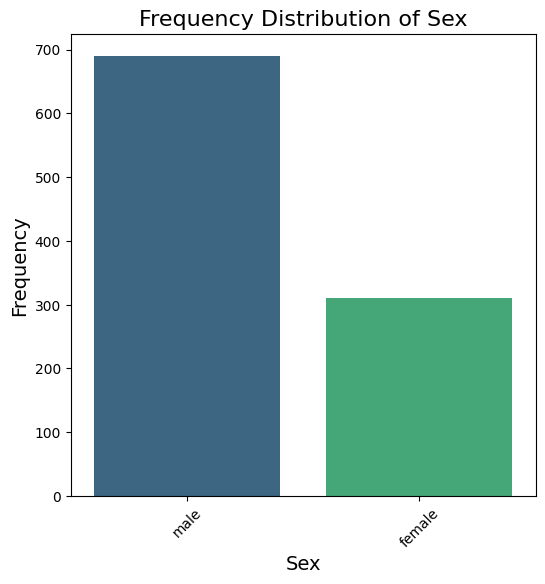

<ipython-input-82-507b0658873c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


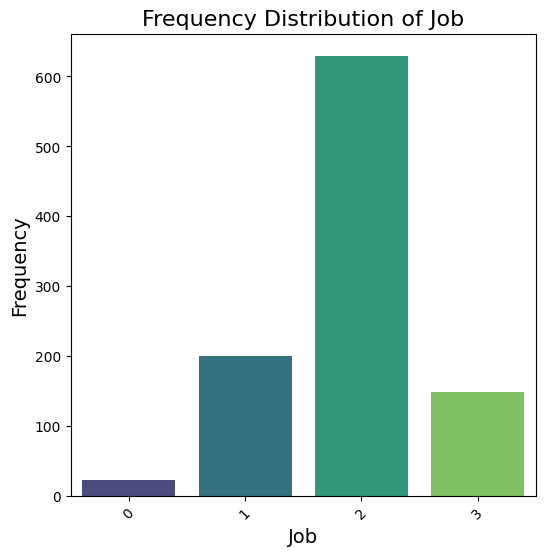

<ipython-input-82-507b0658873c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


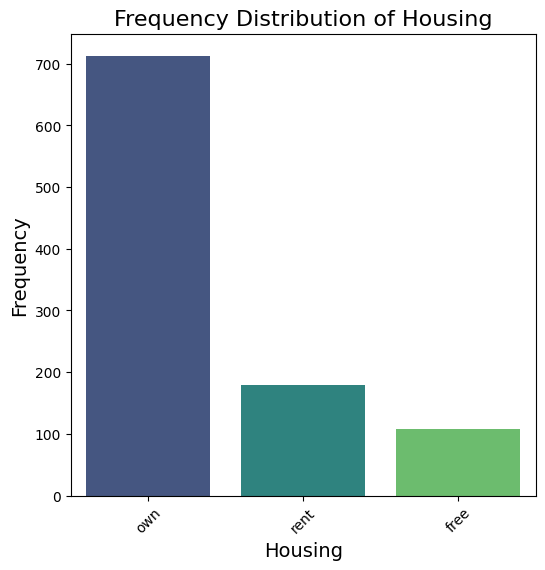

<ipython-input-82-507b0658873c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


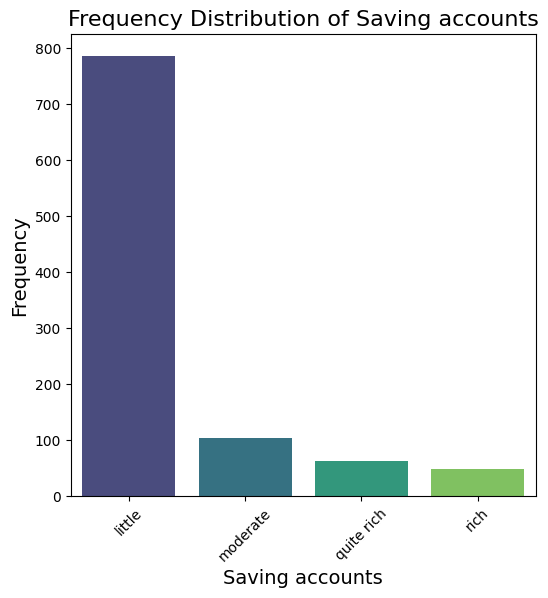

<ipython-input-82-507b0658873c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


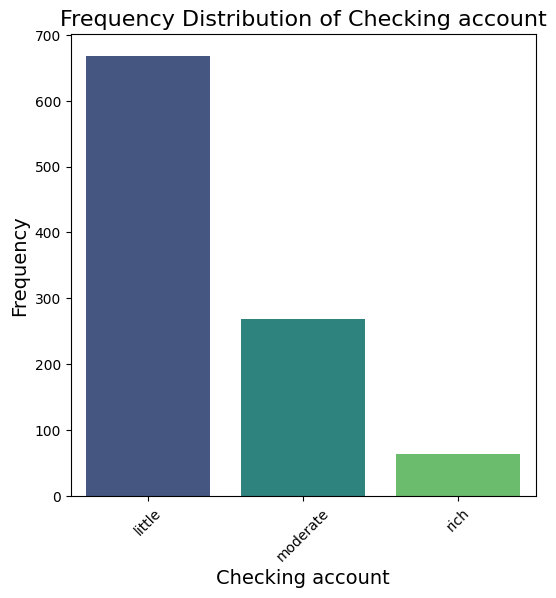

<ipython-input-82-507b0658873c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


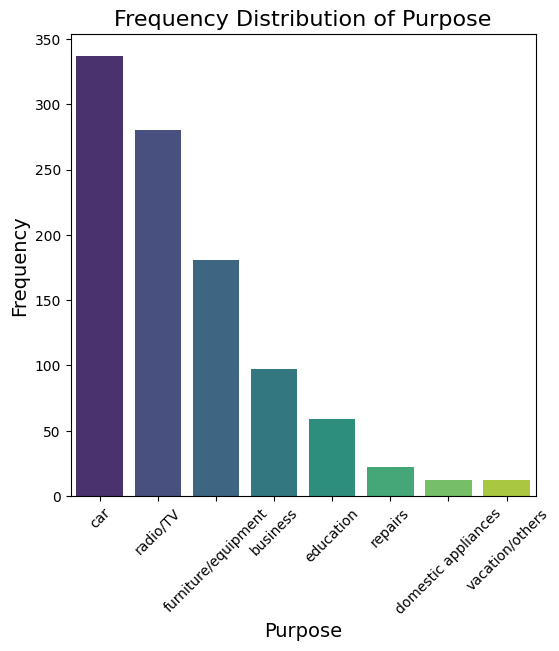

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical attributes
categorical_attributes = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Purpose']

# Loop through each categorical attribute and create a bar plot
for attribute in categorical_attributes:
    # Count the frequency of each category
    category_counts = data[attribute].value_counts()

    # Create a bar plot
    plt.figure(figsize=(6, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

    # Set plot title and labels
    plt.title(f'Frequency Distribution of {attribute}', fontsize=16)
    plt.xlabel(attribute, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

    # Show plot
    plt.show()


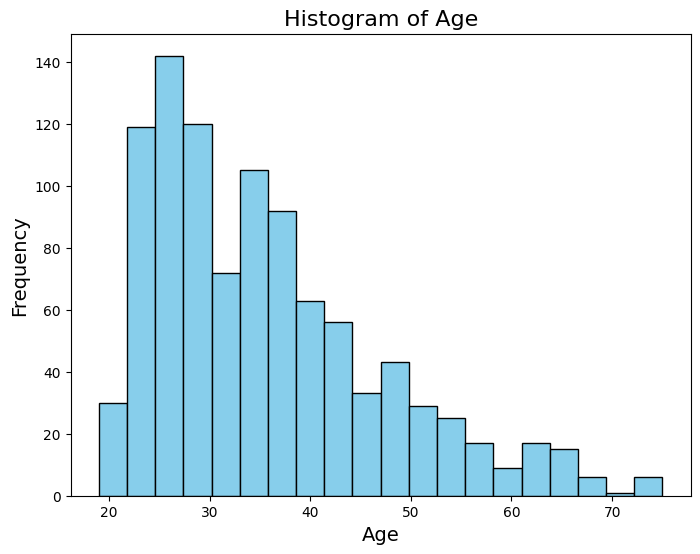

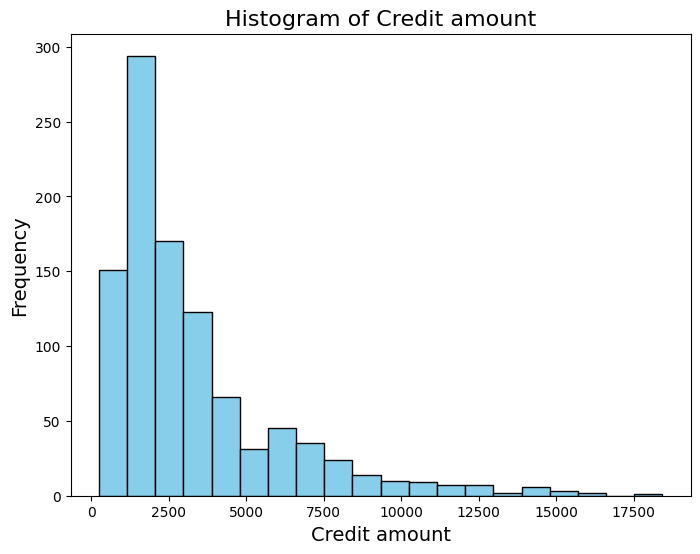

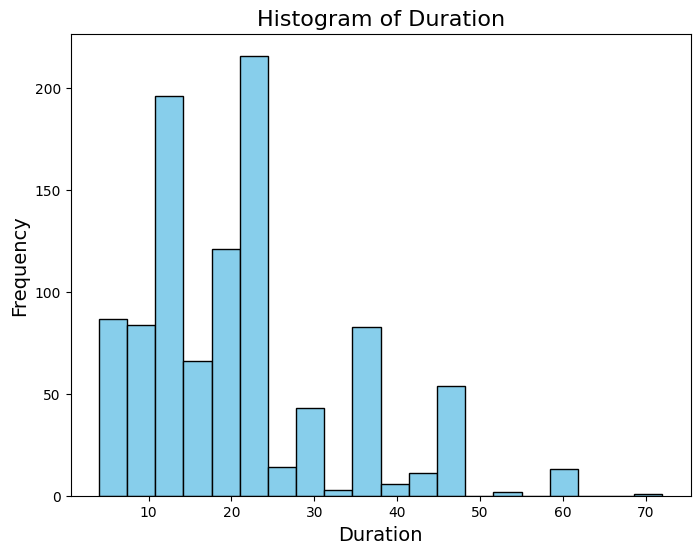

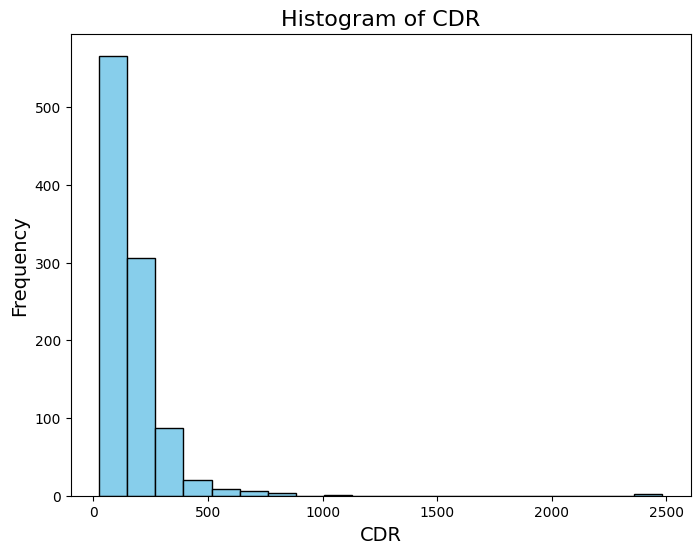

In [ ]:


# Define numerical attributes
numerical_attributes = ['Age', 'Credit amount', 'Duration', 'CDR']

# Loop through each numerical attribute and create a histogram
for attribute in numerical_attributes:
    # Create a histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data[attribute], bins=20, color='skyblue', edgecolor='black')

    # Set plot title and labels
    plt.title(f'Histogram of {attribute}', fontsize=16)
    plt.xlabel(attribute, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Show plot
    plt.show()


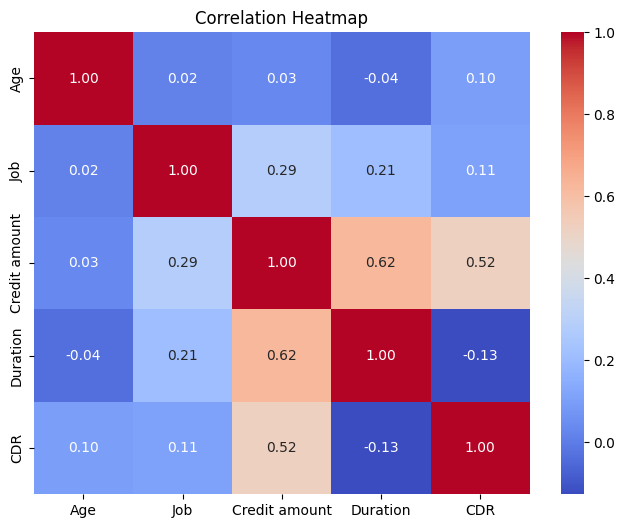

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric attributes
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Selecting only numerical columns for correlation calculation
numeric_data = data.select_dtypes(include='number')

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Define columns for transformation and encoding
numeric_cols = ['Age', 'Credit amount', 'Duration','CDR']
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Define preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features by removing the mean and scaling to unit variance
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps for all columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the entire dataset
processed_data = pd.DataFrame(preprocessor.fit_transform(data))

# Display the processed data
print(processed_data.head())


         0         1         2         3    4    5    6    7    8    9   ...  \
0  2.766456 -0.745131 -1.236478  0.176948  0.0  1.0  0.0  0.0  1.0  0.0  ...   
1 -1.191404  0.949817  2.248194 -0.284901  1.0  0.0  0.0  0.0  1.0  0.0  ...   
2  1.183312 -0.416562 -0.738668  0.045495  0.0  1.0  0.0  1.0  0.0  0.0  ...   
3  0.831502  1.634247  1.750384  0.130233  0.0  1.0  0.0  0.0  1.0  0.0  ...   
4  1.535122  0.566664  0.256953  0.229637  0.0  1.0  0.0  0.0  1.0  0.0  ...   

    18   19   20   21   22   23   24   25   26   27  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 28 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

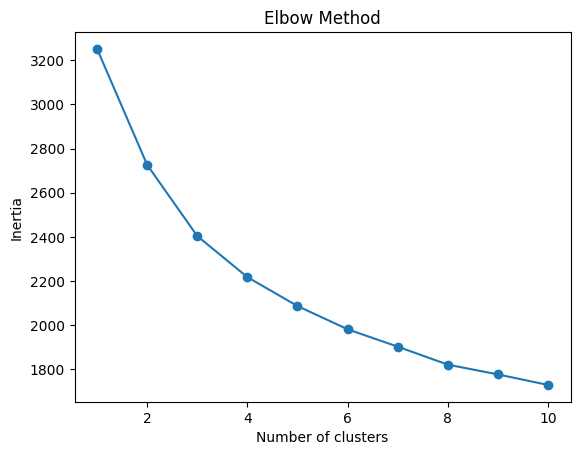

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Assume 'processed_data' contains your preprocessed data

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:

# Based on the elbow curve, choose the optimal number of clusters
# Initialize K-means with the chosen number of clusters
k = 2 # Choose the optimal number of clusters based on the elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)


# Fit K-means to the data
kmeans.fit(processed_data)

# Assign cluster labels to each observation
cluster_labels = kmeans.labels_

# Analyze the clusters
cluster_counts = np.bincount(cluster_labels)
print("Cluster Counts:", cluster_counts)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Counts: [152 469]


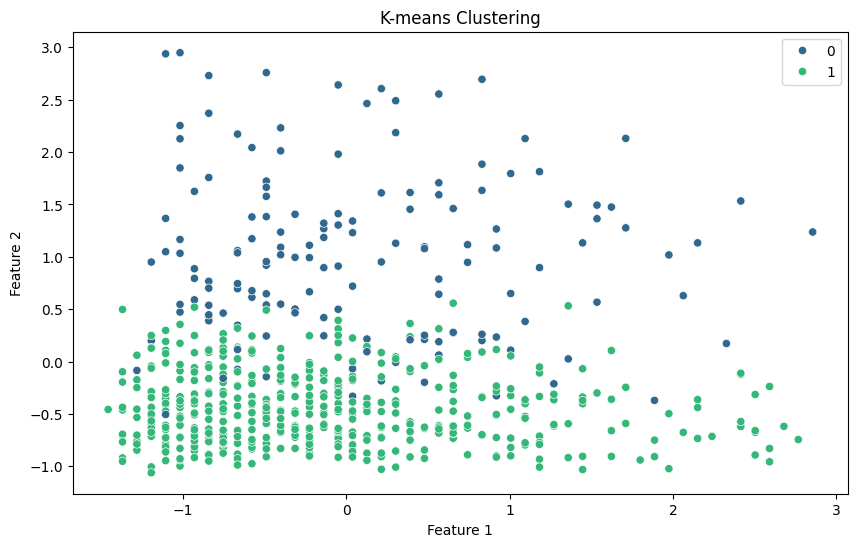

In [ ]:


# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=processed_data.iloc[:, 0], y=processed_data.iloc[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')



plt.show()


In [ ]:
data['Cluster'] = cluster_labels

# Initialize an empty DataFrame to store cluster-wise summary statistics
cluster_summary = pd.DataFrame()

# Iterate over each cluster
for cluster in data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = data[data['Cluster'] == cluster].drop(columns=['Cluster'])

    # Calculate summary statistics for each feature
    cluster_stats = cluster_data.describe().transpose()

    # Add cluster label as a new column
    cluster_stats['Cluster'] = cluster

    # Append cluster statistics to the summary DataFrame
    cluster_summary = pd.concat([cluster_summary, cluster_stats])

# Reset index for better readability
cluster_summary.reset_index(inplace=True)

# Rename columns for clarity
cluster_summary.rename(columns={'index': 'Feature'}, inplace=True)

# Display the cluster-wise summary statistics
print(cluster_summary)

          Feature  count         mean          std          min          25%  \
0             Age  249.0    50.184739     8.939650    36.000000    43.000000   
1             Job  249.0     1.763052     0.732374     0.000000     1.000000   
2   Credit amount  249.0  2285.096386  1465.519389   250.000000  1255.000000   
3        Duration  249.0    15.911647     8.054766     4.000000    11.000000   
4             CDR  249.0   167.382077   130.053872    27.190476    86.666667   
5             Age  182.0    35.313187     9.789257    21.000000    28.000000   
6             Job  182.0     2.236264     0.676523     0.000000     2.000000   
7   Credit amount  182.0  8015.351648  2997.953045  2751.000000  6144.250000   
8        Duration  182.0    37.741758    12.679400     6.000000    30.000000   
9             CDR  182.0   264.964884   271.561397    57.312500   146.437500   
10            Age  569.0    29.214411     5.295467    19.000000    25.000000   
11            Job  569.0     1.859402   

Cluster 0 (Low-risk Profile):

Age: Customers in this cluster are relatively young, with an average age of around 29 years old.
Job: Most customers in this cluster have jobs categorized as low to medium skill level occupations.
Credit amount: These customers typically apply for smaller credit amounts, with an average loan size of around $2,200.
Duration: Loans taken by customers in this cluster are usually short-term, lasting around 18 months on average.
Debt-to-Income Ratio (DTI): Customers in this cluster tend to have a moderate level of debt compared to their income.
Cluster 1 (High-risk Profile):

Age: Customers in this cluster have a wider age range, but on average, they are around 34 years old.
Job: Most customers in this cluster have jobs categorized as medium to high skill level occupations.
Credit amount: These customers typically apply for larger credit amounts, with an average loan size of around $8,100.
Duration: Loans taken by customers in this cluster are usually long-term, lasting around 38 months on average.
Debt-to-Income Ratio (DTI): Customers in this cluster tend to have a high level of debt compared to their income.
Cluster 2 (Medium-risk Profile):

Age: Customers in this cluster are relatively older, with an average age of around 50 years old.
Job: Most customers in this cluster have jobs categorized as low to medium skill level occupations.
Credit amount: These customers typically apply for moderate credit amounts, with an average loan size of around $2,300.
Duration: Loans taken by customers in this cluster are usually of moderate duration, lasting around 16 months on average.
Debt-to-Income Ratio (DTI): Customers in this cluster tend to have a lower level of debt compared to their income.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(processed_data, cluster_labels)
print("Silhouette Score:", silhouette_avg)



Silhouette Score: 0.20119178722466943
